# Ко нас учи?

У оквиру података које је отворило Министарство просвете, науке и технолошког развоја, постоје подаци и о свим запосленима у високошколском образовању, у наставку ове радне свеске позабавићемо се подацима о наставном/научном кадру, које можемо преузети са ове адресе: http://opendata.mpn.gov.rs/index.php?zaposleni=visoko_nastavno. 
У овој свесци наставићемо са експлоративном обрадом података, али са фокусом на селектовање, анализу и представљање сегмената у оквиру веће табеле. Специјално, наставићемо са векторским операцијама над колонама, издвајаћемо подтабеле на основу различитих критеријума а затим анализирати и представљати најинтересантније податке.

Користићемо као и до сада библиотеке numpy, pandas и matplotlib које ћемо учитати и преименовати у њихове типичне скраћенице:

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Податке ћемо учитати из локалног фолдера, у питању је табела преузета са претходног линка (преузета и предобрађена: 13.02.2020.):

In [29]:
zaposleni = pd.read_csv('podaci/MPNTRvisokozaposleni_gender.csv')
zaposleni.head(2)

,Unnamed: 0,#,Država sticanja obrazovanja,Godina izbora u zvanje,Godina sticanja obrazovanja,ID ustanove,ID zaposlenog,Ime,Mesto sticanja obrazovanja,Naziv ustanove,...,Obrazovanje,Prezime,Radno mesto,Tip ustanove,Univerzitet,Ustanova izbora u zvanje,Ustanova sticanja obrazovanja,Zvanje,PrezimeIme,Gender
0,0,1.0,Srbija,2003.0,1992.0,2,381,Aleksandra,Beograd,Arhitektonski fakultet,...,Doktorske studije (po starom),Krstić-Furundžić,"Redovni profesor, samostalni umetnički saradni...",Državni fakultet,Univerzitet u Beogradu,Arhitektonski fakultet u Beogradu,Arhitektonski fakultet u Beogradu,Redovni profesor,"Krstić-Furundžić, Aleksandra",F
1,1,2.0,Srbija,2019.0,2015.0,20,25227,Nemanja,Beograd,Geografski fakultet,...,Master studije (po novom),Vagić,Stručni saradnik na akademiji ili fakultetu um...,Državni fakultet,Univerzitet u Beogradu,Univerzitet u Beogradu - Geografski fakulte,Univerzitet u Beogradu - Geografski fakultet,Asistent,"Vagić, Nemanja",M


Видимо да имамо велики број колона на располагању и пре него што се детаљније позабавимо њима и истраживањем њиховог садржаја, приметићемо само да су прве две колоне вишак и њих ћемо одмах уклонити функцијом *drop*:

In [30]:
zaposleni = zaposleni.drop(columns=['Unnamed: 0','#'])
zaposleni.head(2)

,Država sticanja obrazovanja,Godina izbora u zvanje,Godina sticanja obrazovanja,ID ustanove,ID zaposlenog,Ime,Mesto sticanja obrazovanja,Naziv ustanove,Oblast obrazovanja,Obrazovanje,Prezime,Radno mesto,Tip ustanove,Univerzitet,Ustanova izbora u zvanje,Ustanova sticanja obrazovanja,Zvanje,PrezimeIme,Gender
0,Srbija,2003.0,1992.0,2,381,Aleksandra,Beograd,Arhitektonski fakultet,arhitektura i urbanizam,Doktorske studije (po starom),Krstić-Furundžić,"Redovni profesor, samostalni umetnički saradni...",Državni fakultet,Univerzitet u Beogradu,Arhitektonski fakultet u Beogradu,Arhitektonski fakultet u Beogradu,Redovni profesor,"Krstić-Furundžić, Aleksandra",F
1,Srbija,2019.0,2015.0,20,25227,Nemanja,Beograd,Geografski fakultet,Prostorno planiranje,Master studije (po novom),Vagić,Stručni saradnik na akademiji ili fakultetu um...,Državni fakultet,Univerzitet u Beogradu,Univerzitet u Beogradu - Geografski fakulte,Univerzitet u Beogradu - Geografski fakultet,Asistent,"Vagić, Nemanja",M


Да бисмо прегледали називе колона и истовремено типове података који се у њима налазе (као и њихов број) послужићемо се функцијом *info*:

In [31]:
zaposleni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17368 entries, 0 to 17367
Data columns (total 19 columns):
Država sticanja obrazovanja      17218 non-null object
Godina izbora u zvanje           17222 non-null float64
Godina sticanja obrazovanja      17131 non-null float64
ID ustanove                      17368 non-null int64
ID zaposlenog                    17368 non-null int64
Ime                              17368 non-null object
Mesto sticanja obrazovanja       17222 non-null object
Naziv ustanove                   17368 non-null object
Oblast obrazovanja               17294 non-null object
Obrazovanje                      17221 non-null object
Prezime                          17368 non-null object
Radno mesto                      17219 non-null object
Tip ustanove                     17368 non-null object
Univerzitet                      15126 non-null object
Ustanova izbora u zvanje         17222 non-null object
Ustanova sticanja obrazovanja    17222 non-null object
Zvanje     

Видимо да за сваког од 17368 запослених имамо - име, презиме, тип и назив установе (као и ид запосленог и институције, који нам могу бити од користи ако више различитих запослених имају исто име и презиме, или ако је једна иста особа запослена на више институција), док за неке запослене (опет доста велики број њих) имамо и податке о њиховом претходном образовању (локацији, години стицања и слично).

*Додатни коментар: колона у којој су презиме и име искомбиновани, као и колона Gender су додате у припреми ове табеле и нису део основне табеле која се може преузети са сајта МПНТР.*

### Хистограми

За почетак анализе, фокусираћемо се на податке који су бројчаног типа - на пример година избора у звање, година стицања образовања. Ако на пример одлучимо да линијским дијаграмом представимо колону о години стицања образовања, добићемо овако нешто:

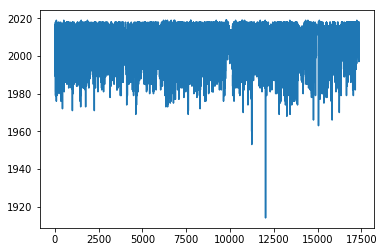

In [32]:
plt.plot(zaposleni['Godina sticanja obrazovanja'])
#plt.plot(zaposleni['Godina sticanja obrazovanja'],'o',alpha=0.5)
plt.show()

Овакав график је нечитљив, али не само зато што смо изабрали линијски дијаграм, ни стубичасти дијаграм не би био од много веће користи за сагледавање ситуације и разумевање. У наставку је једна мало информативнија верзија дијаграма ових истих података:

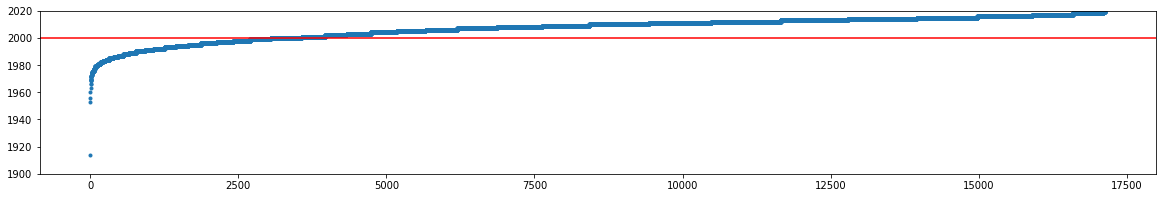

In [33]:
plt.figure(figsize=(20,3))
plt.plot(list(zaposleni['Godina sticanja obrazovanja'].dropna().sort_values()),'.')
plt.axhline(y=2000,color='red')
plt.ylim([1900,2020])
plt.show()

Овде смо поређали запослене по години стицања образовања и посматрали то као један линијски дијаграм (не повезујући тачкице које одговарају различитим особама). На овај начин видимо да постоји једна особа која је образовање стекла пре 1920 године (?! ово треба проверити, може бити грешка у подацима, испитаћемо касније), али видимо и да је највећи број запослених у високом образовању прошло кроз последњи ступањ образовања након 2000 године. За овај закључак послужила нам је хоризонтална црвена линија која одговара 2000. години и само очитавањем пресека црвене линије и наших података можемо проценити колико има оних који су завршили школовање пре 2000 и после 2000. године. Овакве информације још лакше можемо добити користећи се хистограмима и функцијом *hist*.

Хистограм је специфична врста бар плота у коме на x оси више нису појединачни запослени већ бројеви година, специфично интервали година (нпр. од 1990-2000.године, од 2000-2010.године и слично), док је на y оси број запослених који су завршили студије у одређеном интервалу година. Ако размислимо о црвеној линији са претходних плотова, хистограм заправо броји колико тачкица (запослених) се налазило имеђу 2 црвене хоризонталне линије које су границе интервала година.

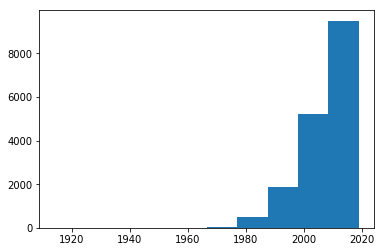

In [34]:
plt.hist(zaposleni['Godina sticanja obrazovanja'].dropna())
plt.show()

Позивање функције *hist* у најбазичнијем облику је приказано на претходном дијаграму. У свом основном облику, функција прође кроз цео низ који смо задали, нађе минималну и максималну вредност (у нашем случају година) и затим тај интервал подели на 10 једнаких интервала, а затим преброји колико има појединачних уноса који се налазе у сваком од интервала.
Уколико желимо да боље контролишемо интервале, то можемо радити уз помоћ додатног аргумента *bins*:

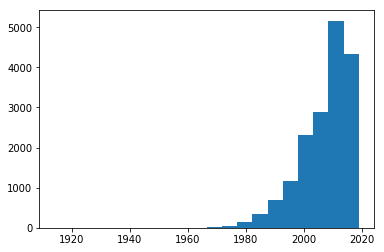

In [35]:
plt.hist(zaposleni['Godina sticanja obrazovanja'].dropna(),bins=20)
plt.show()

Уколико аргументу *bins* проследимо само један број (мора бити природан!), онда ће број интервала (бинова) бити једнак задатом броју. Са друге стране, некад не желимо да границе интервала постану неји разломљени бројеви, нпр. у случају ових година, не желимо да дођемо до интервала чије су границе 2019.2 и 2019.5 зато што су нам године стицања образовања само цели бројеви па би у оваквим интервалима резултат био 0. У овом случају, ми можемо дефинисати границе интервала и то радимо тако што ћемо аргументу бинс проследити листу:

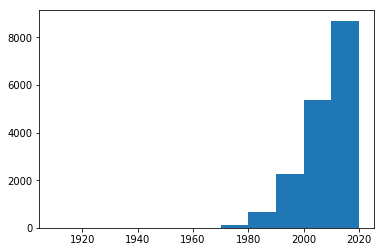

In [36]:
plt.hist(zaposleni['Godina sticanja obrazovanja'].dropna(),bins=[1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020])
plt.show()

А ако хоћемо да сваки интервал буде тачно једна година, то можемо урадити тражећи минималну и максималну годину у низу и искористити функцију *range*.

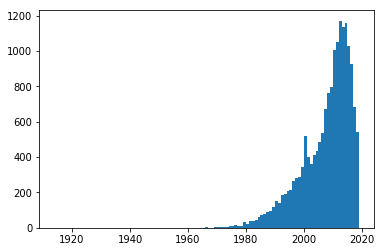

In [37]:
ming = min(zaposleni['Godina sticanja obrazovanja'])
maxg = max(zaposleni['Godina sticanja obrazovanja'])

plt.hist(zaposleni['Godina sticanja obrazovanja'].dropna(),bins = range(int(ming),int(maxg)+1,1))
plt.show()

### Нормална расподела

Пре него што наставимо са обрадом наших, реалних података, направићемо кратку паузу подсећајући се нормалне расподеле, на нумерички начин. У оквиру функције *numpy* имамо на располагању генератор насумичних бројева, па можемо генерисати низ насумичних бројева по нормалној, гаусовој расподели на следећи начин:

In [38]:
np.random.randn(100)

array([ 1.28079012e+00, -5.10936424e-01, -2.17727603e-01, -2.59650902e-01,
       -1.62369156e-01, -2.34976066e-01,  9.56362600e-01,  2.20369522e+00,
        5.21772579e-01,  1.75603263e-02, -8.16158670e-01,  7.47657409e-02,
        3.27192776e-01, -1.52329217e+00, -1.02659047e+00,  7.09322189e-01,
        1.35622273e+00, -4.04740975e-01, -1.46406641e+00, -4.67584611e-01,
       -6.46404818e-01,  3.68768793e-01,  1.07772187e+00,  7.83427192e-01,
       -2.05404437e+00,  1.25032105e+00, -5.88386397e-01,  1.56931983e+00,
        1.32946517e+00, -2.66198320e-01,  2.69521457e-01, -2.13582400e+00,
        6.63243536e-02,  3.53182775e-01, -2.33242294e-01,  3.38191083e-01,
       -1.47698780e-01, -1.13532473e+00, -2.85693262e-01, -2.12803439e+00,
        1.79691788e+00,  2.71902064e-01, -8.30445977e-01, -1.19661277e+00,
       -1.16382666e+00,  5.65253908e-02, -3.71610119e-01,  2.99466758e-02,
        7.04394026e-01,  3.87003235e-01, -7.68629828e-01,  1.24400717e+00,
        1.67803158e-01, -

Овако смо генерисали 100 бројева средње вредности, хистограмом сада можемо проверити колико је то близу изгледа очекивања о изгледу нормалне дистрибуције:

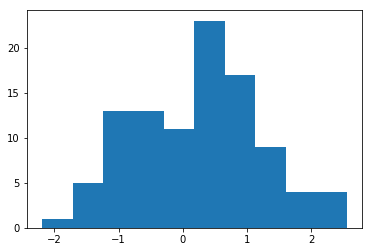

In [39]:
plt.hist(np.random.randn(100))
plt.show()

Ако повећамо дужину низа који генеришемо, ситуација ће се мало поправити, па можемо испитати и просечну вредност и неке друге карактеристике:

In [40]:
brojevi = np.random.randn(10000)
prosek = np.mean(brojevi)

На следећем дијаграму видимо хистограм 10 000 нормално дистрибуираних насумичних бројева са истакнутом просечном вредношћу:

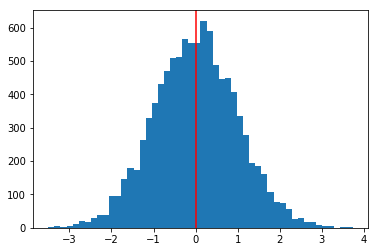

In [41]:
plt.hist(brojevi, bins=50)
plt.axvline(x=prosek,color='red')
plt.show()

Поред просечне вредности, када имамо на располагању бројчане податке, често нас занима и медијална вредност, односно вредност за коју је карактеристично да има једнак број вредности које су мање и веће од ње. Ту вредност можемо наћи на следећи начин:

In [42]:
np.median(brojevi)

0.008525211479203664

In [43]:
np.mean(brojevi)

0.003968232791182311

Оно што је битно приметити и имати на уму је да су код нормалне дистрибуције, просечна, медијална и највероватнија вредност исте, што није тако често у дистрибуцијама реалних података, што ћемо убрзо и демонстрирати!

### Селектовање података из табела

Пре него што се вратимо подацима о години завршетка студија, претходно смо приметили један потенцијално необичан, можда погрешан података. Наиме, видели смо да постоји једна особа у подацима чија је година стицања образовања и пре 1920! Та особа би тренутно имала преко 120 година, па је интересантно видети ко је особа у питању (ако је податак реалан, желимо да знамо ко је особа из знатижеље и поштовања, а ако је посреди грешка, хоћемо да видимо како бисмо могли да је коригујемо).

У току претходних субота виђали сте селектовање делова табела уз помоћ фунцкција *loc* и *iloc*, док ћемо сада издвојити ред табеле по критеријуму везаном за унете вредности. За почетак, приметимо следеће:

In [44]:
zaposleni['Godina sticanja obrazovanja']<2000

0         True
1        False
2        False
3        False
4         True
5        False
6        False
7        False
8         True
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
17338    False
17339    False
17340    False
17341     True
17342     True
17343    False
17344    False
17345    False
17346    False
17347    False
17348    False
17349    False
17350    False
17351     True
17352    False
17353    False
17354    False
17355    False
17356    False
17357    False
17358    False
17359    False
17360    False
17361    False
17362    False
17363    False
17364    False
17365    False
17366    False
17367    False
Name: Godina sticanja obrazovanja, Length: 17368, dtype: bool

Овако добијамо низ вредности тачно-нетачно зависно од тога да ли одређени елемент низа задовољава дати критеријум или не. Ово нам је изузетно згодно зато што се овај низ вредности може искористити као аргумент табеле, у ком случају ћемо добити само оне вреднсоти из табеле за које је аргумент Тачно, па на тај начин можемо видети ко је особа која је образовање стекла 1920. године:

In [45]:
zaposleni[zaposleni['Godina sticanja obrazovanja']<1920]

,Država sticanja obrazovanja,Godina izbora u zvanje,Godina sticanja obrazovanja,ID ustanove,ID zaposlenog,Ime,Mesto sticanja obrazovanja,Naziv ustanove,Oblast obrazovanja,Obrazovanje,Prezime,Radno mesto,Tip ustanove,Univerzitet,Ustanova izbora u zvanje,Ustanova sticanja obrazovanja,Zvanje,PrezimeIme,Gender
12026,Srbija,2015.0,1914.0,12,14618,Zorana,Beograd,Filozofski fakultet,psihologija,Doktorske studije (po starom),Jolić Marjanović,"Docent, naučni saradnik, umetnički saradnik, b...",Državni fakultet,Univerzitet u Beogradu,Univerzitet u Beogradu,Filozofski fakultet u Beogradu,Docent,"Jolić Marjanović, Zorana",F


Посматрањем осталих података о овој особи (што у табели што нпр. претрагом на нардус платформи), видимо да је посреди омашка, година стицања доктората је 2014, а не 1914, што на следећи начин можемо исправити:

In [46]:
# Опрезно са исправљањем података!
zaposleni.loc[12026,'Godina sticanja obrazovanja']=2014
#zaposleni = zaposleni.replace({'Godina sticanja obrazovanja': {1914: 2014}})
zaposleni[zaposleni['Godina sticanja obrazovanja']<1920]

,Država sticanja obrazovanja,Godina izbora u zvanje,Godina sticanja obrazovanja,ID ustanove,ID zaposlenog,Ime,Mesto sticanja obrazovanja,Naziv ustanove,Oblast obrazovanja,Obrazovanje,Prezime,Radno mesto,Tip ustanove,Univerzitet,Ustanova izbora u zvanje,Ustanova sticanja obrazovanja,Zvanje,PrezimeIme,Gender


Сада ћемо поново нацртати хистограм по годинама стицања образовања и на њему назначити просечну и медијалну вредност:

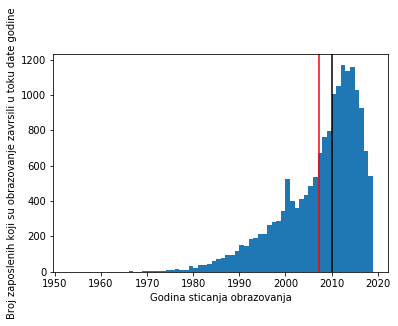

In [47]:
ming = min(zaposleni['Godina sticanja obrazovanja'])
maxg = max(zaposleni['Godina sticanja obrazovanja'])

prosek = np.mean(zaposleni['Godina sticanja obrazovanja'].dropna())
medijana = np.median(zaposleni['Godina sticanja obrazovanja'].dropna())

plt.hist(zaposleni['Godina sticanja obrazovanja'].dropna(),bins = range(int(ming),int(maxg)+1,1))
plt.axvline(x=prosek, color='red')
plt.axvline(x=medijana, color='black')

plt.xlabel('Godina sticanja obrazovanja')
plt.ylabel('Broj zaposlenih koji su obrazovanje zavrsili u toku date godine')

plt.show()

Управо у овој расподели броја запослених по години стицања образовања, видимо да су просечна вредност (црвено), медијална вредност (црно) и најпопуларнија вредност (пик, тј. максимум расподеле) три различите године. Видимо још једну необичност на овој расподели (коју сте можда уочили још када смо је први пут нацртали), а то је ова година на којој број запослених одскаче у односу на број запослених у суседним годинама.

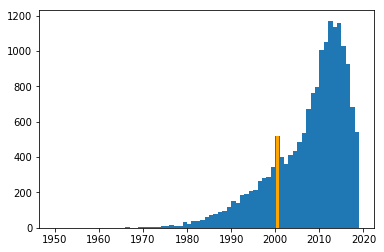

In [48]:
plt.hist(zaposleni['Godina sticanja obrazovanja'].dropna(),bins=range(1950,2020))
plt.bar(2000.5,len(zaposleni[zaposleni['Godina sticanja obrazovanja']==2000]),color='orange')
plt.show()

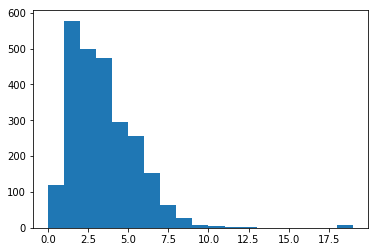

In [49]:
zaposleni['godine rada']=2019-zaposleni['Godina izbora u zvanje']
asistenti=zaposleni[zaposleni.Zvanje=='Asistent']
plt.hist(asistenti['godine rada'].dropna(),bins=range(int(min(asistenti['godine rada'])),int(max(asistenti['godine rada'])+1)))
plt.show()

In [50]:
asistenti[asistenti['godine rada']>15]

,Država sticanja obrazovanja,Godina izbora u zvanje,Godina sticanja obrazovanja,ID ustanove,ID zaposlenog,Ime,Mesto sticanja obrazovanja,Naziv ustanove,Oblast obrazovanja,Obrazovanje,Prezime,Radno mesto,Tip ustanove,Univerzitet,Ustanova izbora u zvanje,Ustanova sticanja obrazovanja,Zvanje,PrezimeIme,Gender,godine rada
7317,Srbija,2000.0,2000.0,52,25508,Predrag,Niš,Građevinsko-arhitektonski fakultet,građevinarstvo,Doktorske studije (po starom),Blagojević,"Asistent, doktor nauka",Državni fakultet,Univerzitet u Nišu,Građevinsko-arhitektonski fakultet Univerzitet...,Građevinsko-arhitektonski fakultet Univerzitet...,Asistent,"Blagojević, Predrag",M,19.0
12018,Srbija,2000.0,2000.0,12,14604,Galina,Beograd,Filozofski fakultet,Filozofija,Doktorske studije (po starom),Janjušić,"Asistent, doktor nauka",Državni fakultet,Univerzitet u Beogradu,Univerzitet u Beogradu,Filozofski fakultet u Beogradu,Asistent,"Janjušić, Galina",F,19.0
12114,Srbija,2000.0,1996.0,12,14767,Želimir,Beograd,Filozofski fakultet,pedagogija i andragogija,Magistarske studije (po starom),Popov,"Asistent-magistar, istraživač-saradnik, asiste...",Državni fakultet,Univerzitet u Beogradu,Univerzitet u Beogradu,Filozofski fakultet u Beogradu,Asistent,"Popov, Želimir",M,19.0
13569,Srbija,2000.0,2000.0,68,16939,Nikola,nema,Prirodno-matematički fakultet,nema,Doktorske studije (po starom),Vučinić,"Asistent, doktor nauka",Državni fakultet,Univerzitet u Novom Sadu,Medicinski fakultet,nema,Asistent,"Vučinić, Nikola",M,19.0
14726,Srbija,2000.0,2010.0,198,22138,Melanija,Novi Sad,Fakultet za evropske pravno-političke studije ...,pravo,Osnovne studije (po starom),Jančić,Asistent pripravnik,Državni fakultet,Univerzitet Edukons,"Fakultet za evropske pravnopolitičke studije, ...","Pravni fakultet za privredu i pravosuđe, Novi Sad",Asistent,"Jančić, Melanija",F,19.0
15079,Srbija,2000.0,2000.0,68,20857,Sandra,nema,Prirodno-matematički fakultet,prava,Master studije (po novom),Samardžić,"Asistent-magistar, istraživač-saradnik, asiste...",Državni fakultet,Univerzitet u Novom Sadu,Pravni fakultet Novi Sad,nema,Asistent,"Samardžić, Sandra",F,19.0
17149,Srbija,2000.0,2017.0,62,25034,Aleksandar,Novi Sad,Fakultet tehničkih nauka,Elektrotehnika i računarstvo,Master studije (po novom),Lukić,Asistent pripravnik,Državni fakultet,Univerzitet u Novom Sadu,Fakultet tehničkih nauka,Fakultet tehničkih nauka,Asistent,"Lukić, Aleksandar",M,19.0


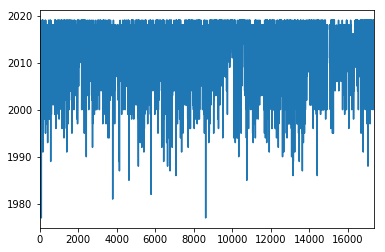

In [51]:
zaposleni['Godina izbora u zvanje'].plot()

Уочавамо да је ова специјална година 2000. а у наставку ћемо пробати додатно да испитамо да ли има још нешто специфично за ову годину. Уведимо пре тога још једну колону у којој ћемо сачувати број година које су протекле од стицања образовања до избора у одговарајуће звање:

In [52]:
zaposleni['Vreme cekanja na zvanje'] = zaposleni['Godina izbora u zvanje']-zaposleni['Godina sticanja obrazovanja']

И ову нову колону можемо представити хистограмом да стекнемо утисак о популарним вредностима (високи барови на дијаграму):

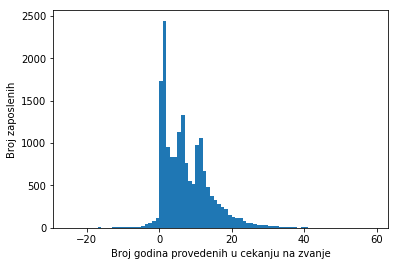

In [53]:
ming = min(zaposleni['Vreme cekanja na zvanje'])
maxg = max(zaposleni['Vreme cekanja na zvanje'])
plt.hist(zaposleni['Vreme cekanja na zvanje'].dropna(),bins = range(int(ming),int(maxg)+1,1))
plt.xlabel('Broj godina provedenih u cekanju na zvanje')
plt.ylabel('Broj zaposlenih')
plt.show()

Видимо да је на неке позиције могуће доћи одмах по завршетку студија - то је илустровано високим баровима на позицији 0 и 1, док имамо нешто касније још два максимума, око 5 и 10 година, што су типичне вредности од доктората до ванредне и редовне професуре а условљене су законским и другим очекивањима. Ово нам говори да је за неке од анализа потребно да групишемо податке по различитим звањима пошто редовни професори и асистенти нису увек упоредиви.

Додатно примећујемо да постоје негативне вредности! То нас подсећа да је наша анализа добра онолико колико су и подаци добри, а они ће често бити непотпуни :) Овог пута нећемо ићи у детаље и покушати да коригујемо податке, већ је само битно да будемо свесни ове чињенице, поготово кад будемо извлачили закључке на основу ње.

## Груписање података

У разним колонама које имамо на располагању имамо само пар различитих вредности које се понављају, пример таквих колона су звање, универзитет, род, итд. Проверу различитих вредности које се налазе у колони можемо извршити функцијом *unique*:

In [54]:
zaposleni['Zvanje'].unique()

array(['Redovni profesor', 'Asistent', 'Saradnik u nastavi',
       'Vanredni profesor', 'Docent', 'Nastavnik stranog jezika',
       'Nastavnik veština', 'Ostalo', 'Istraživač saradnik',
       'Istraživač pripravnik', 'Predavač', 'Profesor strukovnih studija',
       'Asistent pripravnik', 'Profesor emeritus', 'Gostujući profesor',
       'Naučni savetnik', 'Stručni saradnik', 'Lektor', 'Naučni saradnik',
       'Viši naučni saradnik', 'Viši lektor', nan], dtype=object)

Слично можемо видети које вредности се крију у колони Универзитет:

In [55]:
zaposleni['Univerzitet'].unique()

array(['Univerzitet u Beogradu', 'Univerzitet u Novom Sadu',
       'Univerzitet u Nišu', 'Državni Univerzitet u Novom Pazaru',
       'Univerzitet umetnosti u Beogradu', 'Univerzitet u Kragujevcu',
       'Univerzitet u Prištini', nan, 'Univerzitet Singidunum',
       'Univerzitet Alfa BK', 'Univerzitet Megatrend',
       'Univerzitet Edukons', 'Univerzitet Union - Nikola Tesla',
       'Univerzitet Privredna akademija', 'Univerzitet Union',
       'Univerzitet odbrane'], dtype=object)

Када имамо категоричке податке попут ових, то можемо користити на више начина: 
- да селектујемо само делове табеле који имају одређену категоричку вредност (или комбинацију истих), на пример, да направимо нову табелу у којој су подаци само о редовним професорима
- да пребројавамо, усредњавамо, сумирамо неке бројчане податке, али тако што ћемо их груписати по овим категоричким вредностима, нпр. можемо пребројати колико има запослених на ком универзитету, колико времена у просеку протекне између доктората и редовне професуре на различитим факултетима и слично.
Селектовање делова табеле смо већ помало виђали (и наставићемо да ово вежбамо и унапређујемо), а сада ћемо се упознати и са предностима које нам пружа функција *groupby*.

Ако хоћемо да видимо колико има запослених на различитим универзитетима то можемо радити кроз петљу, тако што ћемо за сваки универзитет селектовати део табеле у коме је вредност колоне Универзитет једнака датом унивезитету и проверавати величину такве табеле. Нпр. за Београдски универзитет то би изгледало овако:

In [56]:
zaposleni[zaposleni['Univerzitet']=='Univerzitet u Beogradu']

,Država sticanja obrazovanja,Godina izbora u zvanje,Godina sticanja obrazovanja,ID ustanove,ID zaposlenog,Ime,Mesto sticanja obrazovanja,Naziv ustanove,Oblast obrazovanja,Obrazovanje,...,Radno mesto,Tip ustanove,Univerzitet,Ustanova izbora u zvanje,Ustanova sticanja obrazovanja,Zvanje,PrezimeIme,Gender,godine rada,Vreme cekanja na zvanje
0,Srbija,2003.0,1992.0,2,381,Aleksandra,Beograd,Arhitektonski fakultet,arhitektura i urbanizam,Doktorske studije (po starom),...,"Redovni profesor, samostalni umetnički saradni...",Državni fakultet,Univerzitet u Beogradu,Arhitektonski fakultet u Beogradu,Arhitektonski fakultet u Beogradu,Redovni profesor,"Krstić-Furundžić, Aleksandra",F,16.0,11.0
1,Srbija,2019.0,2015.0,20,25227,Nemanja,Beograd,Geografski fakultet,Prostorno planiranje,Master studije (po novom),...,Stručni saradnik na akademiji ili fakultetu um...,Državni fakultet,Univerzitet u Beogradu,Univerzitet u Beogradu - Geografski fakulte,Univerzitet u Beogradu - Geografski fakultet,Asistent,"Vagić, Nemanja",M,0.0,4.0
3,Srbija,2016.0,2000.0,21,22520,Marija,Beograd,Hemijski fakultet,biohemija,Master studije (po novom),...,Stručni saradnik,Državni fakultet,Univerzitet u Beogradu,Hemijski fakultet,Hemijski fakultet,Saradnik u nastavi,"Lješević, Marija",F,3.0,16.0
4,Srbija,2010.0,1993.0,18,10,Borivoj,Beograd,Fakultet za fizičku hemiju,fizička hemija,Doktorske studije (po starom),...,"Redovni profesor, samostalni umetnički saradni...",Državni fakultet,Univerzitet u Beogradu,Univerzitet u Beogradu - Fakultet za fizičku h...,Prirodno-matematički fakultet Fakultet za fizi...,Redovni profesor,"Adnađević, Borivoj",M,9.0,17.0
5,Srbija,2012.0,2000.0,18,11,Dragomir,Beograd,Fakultet za fizičku hemiju,fizička hemija,Doktorske studije (po starom),...,"Redovni profesor, samostalni umetnički saradni...",Državni fakultet,Univerzitet u Beogradu,Univerzitet u Beogradu,Univerzitet u Beogradu - Fakultet za fizičku h...,Redovni profesor,"Stanisavljev, Dragomir",M,7.0,12.0
6,Srbija,2014.0,2001.0,18,12,Nikola,Beograd,Fakultet za fizičku hemiju,fizička hemija,Doktorske studije (po starom),...,"Redovni profesor, samostalni umetnički saradni...",Državni fakultet,Univerzitet u Beogradu,Univerzitet u Beogradu - Fakultet za fizičku h...,Univerzitet u Beogradu - Fakultet za fizičku h...,Redovni profesor,"Cvjetićanin, Nikola",M,5.0,13.0
7,Srbija,2014.0,2001.0,18,13,Jasmina,Beograd,Fakultet za fizičku hemiju,fizička hemija,Doktorske studije (po starom),...,"Redovni profesor, samostalni umetnički saradni...",Državni fakultet,Univerzitet u Beogradu,Univerzitet u Beogradu - Fakultet za fizičku h...,Univerzitet u Beogradu - Fakultet za fizičku h...,Redovni profesor,"Dimitrić-Marković, Jasmina",F,5.0,13.0
8,Srbija,2015.0,1993.0,18,15,Nikola,Beograd,Fakultet za fizičku hemiju,fizička hemija,Doktorske studije (po starom),...,"Redovni profesor, samostalni umetnički saradni...",Državni fakultet,Univerzitet u Beogradu,Univerzitet u Beogradu - Fakultet za fizičku h...,Prirodno-matematički fakultet Fakultet za fizi...,Redovni profesor,"Vukelić, Nikola",M,4.0,22.0
9,Srbija,2015.0,2003.0,18,16,Gordana,Beograd,Fakultet za fizičku hemiju,fizička hemija,Doktorske studije (po starom),...,"Redovni profesor, samostalni umetnički saradni...",Državni fakultet,Univerzitet u Beogradu,Univerzitet u Beogradu - Fakultet za fizičku h...,Fakultet za fizičku hemiju Univerzitet u Beogradu,Redovni profesor,"Ćirić-Marjanović, Gordana",F,4.0,12.0
10,Srbija,2014.0,2002.0,18,17,Miroslav,Beograd,Fakultet za fizičku hemiju,fizička hemija,Doktorske studije (po starom),...,"Vanredni profesor, viši naučni saradnik, viši ...",Državni fakultet,Univerzitet u Beogradu,Univerzitet u Beogradu - Fakultet za fizičku h...,Univerzitet u Beogradu - Fakultet za fizičku h...,Vanredni profesor,"Kuzmanović, Miroslav",M,5.0,12.0


Овим смо само погледали одговарајући део табеле, а можемо тај део табеле сачувати као посебну табелу:

In [57]:
buzaposleni = zaposleni[zaposleni['Univerzitet']=='Univerzitet u Beogradu']

Којој можемо утврдити и величину:

In [58]:
len(buzaposleni)

5837

Покушајте да направите листу у коју ћете унети све бројеве запослених за све универзитете, тако што ћете претходне линије кода ставити у једну петљу. А сада ћемо ипак то урадити уз помоћ функције *groupby*:

In [59]:
zaposleni.groupby('Univerzitet').size()

Univerzitet
Državni Univerzitet u Novom Pazaru     274
Univerzitet Alfa BK                     63
Univerzitet Edukons                     87
Univerzitet Megatrend                  255
Univerzitet Privredna akademija         14
Univerzitet Singidunum                 379
Univerzitet Union                        2
Univerzitet Union - Nikola Tesla        68
Univerzitet odbrane                      2
Univerzitet u Beogradu                5837
Univerzitet u Kragujevcu              1386
Univerzitet u Nišu                    1592
Univerzitet u Novom Sadu              3757
Univerzitet u Prištini                 839
Univerzitet umetnosti u Beogradu       571
dtype: int64

Слично можемо испитати и нацртати податке о броју запослених у различитим звањима:

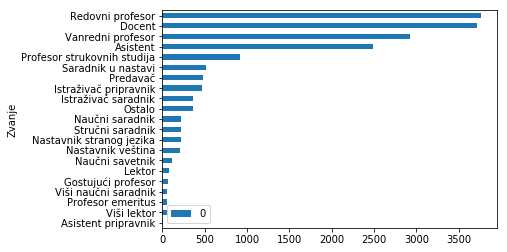

In [60]:
pd.DataFrame(zaposleni.groupby('Zvanje').size()).sort_values(by=0).plot(kind = 'barh')

Сада када смо видели појединачне алате, можемо се фокусирати на различита питања о овим подацима.

На пример, често се прича о затворености наших високошколских установа за научно-наставни кадар који се школовао негде друго. Како имамо те податке на располагању, можемо испитати у којим државама су се школовали редовни професори Универзитета у Београду.

Прво ћемо издвојити из табеле податке о редовним професорима Универзитета у Београду:

In [61]:
BUredovniprof = zaposleni[(zaposleni['Zvanje']=='Redovni profesor')&(zaposleni['Univerzitet']=='Univerzitet u Beogradu')]
BUredovniprof.head(2)

,Država sticanja obrazovanja,Godina izbora u zvanje,Godina sticanja obrazovanja,ID ustanove,ID zaposlenog,Ime,Mesto sticanja obrazovanja,Naziv ustanove,Oblast obrazovanja,Obrazovanje,...,Radno mesto,Tip ustanove,Univerzitet,Ustanova izbora u zvanje,Ustanova sticanja obrazovanja,Zvanje,PrezimeIme,Gender,godine rada,Vreme cekanja na zvanje
0,Srbija,2003.0,1992.0,2,381,Aleksandra,Beograd,Arhitektonski fakultet,arhitektura i urbanizam,Doktorske studije (po starom),...,"Redovni profesor, samostalni umetnički saradni...",Državni fakultet,Univerzitet u Beogradu,Arhitektonski fakultet u Beogradu,Arhitektonski fakultet u Beogradu,Redovni profesor,"Krstić-Furundžić, Aleksandra",F,16.0,11.0
4,Srbija,2010.0,1993.0,18,10,Borivoj,Beograd,Fakultet za fizičku hemiju,fizička hemija,Doktorske studije (po starom),...,"Redovni profesor, samostalni umetnički saradni...",Državni fakultet,Univerzitet u Beogradu,Univerzitet u Beogradu - Fakultet za fizičku h...,Prirodno-matematički fakultet Fakultet za fizi...,Redovni profesor,"Adnađević, Borivoj",M,9.0,17.0


Сада у овој табели можемо груписати податке по Држави стицања образовања и уз помоћ опције size видети величину сваке од подгрупа, тј. колико је редовних професора студирало у неким другим државама:

In [62]:
BUredovniprof.groupby('Država sticanja obrazovanja').size()

Država sticanja obrazovanja
Australija                       1
Belgija                          1
Bosna i Hercegovina              6
Crna Gora                        2
Francuska                        2
Grčka                            4
Holandija                        1
Hrvatska                         1
Irska                            1
Izrael                           1
Japan                            1
Mađarska                         2
Nemačka                          8
Sjedinjene Američke Države      17
Slovenija                        1
Srbija                        1448
Ukrajina                         1
Velika Britanija                 3
Španija                          1
Švajcarska                       3
dtype: int64

Не тако изненађујуће, највећи број професора школовао се у Србији, али хајде да видимо ове бројеве на стубичастом дијаграму:

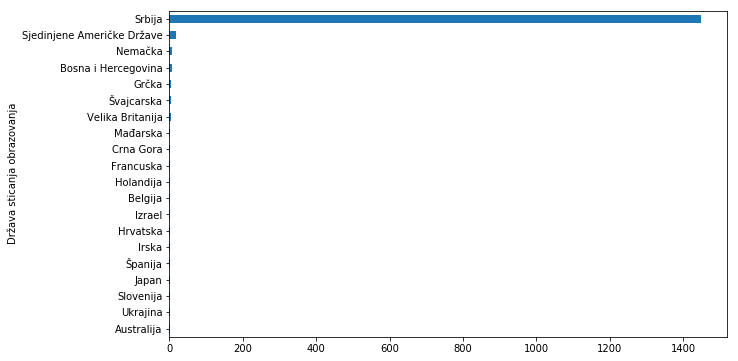

In [63]:
plt.figure(figsize=(10,6))
BUredovniprof.groupby('Država sticanja obrazovanja').size().sort_values().plot(kind='barh')
plt.show()

Највећи број држава је практично невидљив на овом дијаграму! Ситуацију можемо мало поравити, ако се фокусирамо само на државе које нису Србија

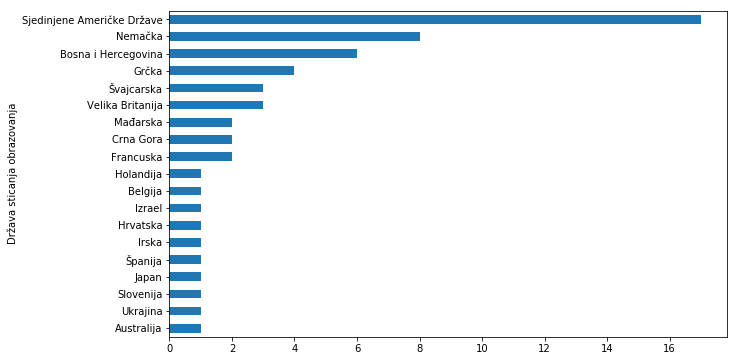

In [64]:
plt.figure(figsize=(10,6))
BUredovniprof[BUredovniprof['Država sticanja obrazovanja']!='Srbija'].groupby(BUredovniprof['Država sticanja obrazovanja']).size().sort_values().plot(kind='barh')
plt.show()

Ово је једна од ситуација у којој и највећи противници секторског дијаграма виде потенцијал употребе те врсте визуелизације:

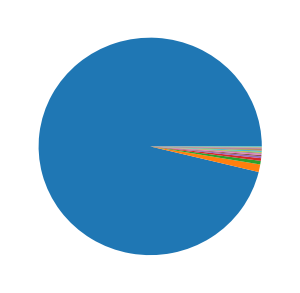

In [65]:
plt.figure(figsize=(5,5))
plt.pie(BUredovniprof.groupby(BUredovniprof['Država sticanja obrazovanja']).size().sort_values(ascending=False))
plt.show()

...не зато што бисмо питастим дијаграмом желели детаљније да завирујемо у мање заступљене земље, него зато што хоћемо на најдиректнији начин да сагледамо како је мали удео редовних професора имао искуства са неким другим образовним системом. Проценат њих је:

In [66]:
100*len(BUredovniprof[BUredovniprof['Država sticanja obrazovanja']!='Srbija'])/len(BUredovniprof)

3.787375415282392

Друго интересантно питање на које одговор можемо потражити у овим подацима тиче се родне равноправности у академским круговима. У претходним радним свескама видели смо да више жена данас студира, и више завршава студије, па се питамо какво је стање међу запосленима у високом образовању. 

Одговор на ово питање можемо истражити на нивоу целе популације редовних професора у Србији, али и раздвојено по универзитетима и факултетима. За почетак, брзо можемо проверити какво је стање у целој популацији:

In [67]:
redovniprof=zaposleni[zaposleni['Zvanje']=='Redovni profesor']
redovniprof.groupby('Gender').size()

Gender
-     292
F    1479
M    1993
dtype: int64

Што можемо и визуелно представити:

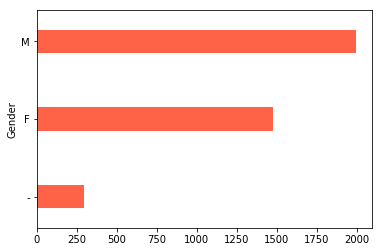

In [68]:
redovniprof.groupby('Gender').size().plot(kind='barh',color='tomato',width=0.3)
plt.show()

Даље, можемо истражити да ли је на неким универзитетима стање мало боље. За то ћемо издвојити прво табелу редовних професора мушког рода груписану по универзитетима:

In [69]:
redovniprofM = pd.DataFrame(redovniprof[redovniprof['Gender']=='M'].groupby('Univerzitet').size())
redovniprofM.head(2)

,0
Univerzitet,
Državni Univerzitet u Novom Pazaru,27
Univerzitet Alfa BK,4


Како новонастала колона има име 0, променићемо га зарад лакшег праћења колоне касније:

In [70]:
redovniprofM = redovniprofM.rename(columns={0:'Profesori'})

Слично ћемо урадити пратећи професорке:

In [71]:
redovniprofF = pd.DataFrame(redovniprof[redovniprof['Gender']=='F'].groupby('Univerzitet').size())
redovniprofF.head(2)

,0
Univerzitet,
Državni Univerzitet u Novom Pazaru,6
Univerzitet Alfa BK,4


In [72]:
redovniprofF = redovniprofF.rename(columns={0:'Profesorke'})

На овај начин, добили смо две табеле индексиране по универзитету које садрже податке о бројевима професора, односно професорки. Како бисмо лакше нацртали одговарајуће графике, новонастале табеле можемо спојити у једну по заједничкој колони Универзитет:

In [73]:
pd.merge(redovniprofM,redovniprofF, on='Univerzitet',how='outer')

,Profesori,Profesorke
Univerzitet,,
Državni Univerzitet u Novom Pazaru,27,6.0
Univerzitet Alfa BK,4,4.0
Univerzitet Edukons,9,3.0
Univerzitet Megatrend,36,24.0
Univerzitet Privredna akademija,1,2.0
Univerzitet Singidunum,46,17.0
Univerzitet Union,1,NaN
Univerzitet Union - Nikola Tesla,8,3.0
Univerzitet u Beogradu,780,635.0


Исход овог спајања можемо сачувати у нову табелу коју касније можемо додатно анализирати и цртати:

In [74]:
profesori_profesorke = pd.merge(redovniprofM,redovniprofF, on='Univerzitet',how='outer')

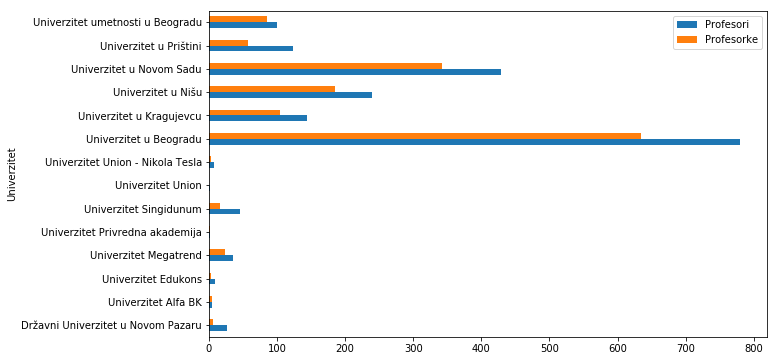

In [75]:
profesori_profesorke.plot(kind='barh',figsize=(10,6))
plt.show()

### Задаци

1. У табелу profesori_profesorke унети нову колону у којој је однос професора и професорки. Сортирати табелу по том односу и нацртати одговарајући стубичасти дијаграм. 

2. Истражити време чекања на звање за различита звања (нпр. доцентуру, ванредне професоре и сл.) уз помоћ хистограма. Раније смо нацртали хистограм времена проведеног у чекању на различита звања где смо искомбиновали сва звања, резултујући дијаграм ће се разликовати када се фокусирате само на једно звање. Фокусирајте се само на позитивне вредности. Истражите да ли су ове дистрибуције различите за различите универзитете (тј. да ли се нпр. редовним професором постаје брже на неким универзитетима). Коначне резултате можете представити у виду стубичастог дијаграма просечног времена чекања за различите универзитете.

3. Испитати да ли је родно заснована разлика међу редовним професорима карактеристика само те позиције, или се појављује и на нижим ступњевима лествице (асистент, доцент, ванредни професор). Можете поновити исти след команди и нацртати стубичасти дијаграм 

Питање на које смо заједно одговоарали - да ли је време чекања на звање редовног професора различито за мушкарце и жене?

In [7]:
redovniprof = zaposleni[zaposleni['Zvanje']=='Redovni profesor']

In [9]:
redovniprofM = redovniprof[redovniprof['Gender']=='M']
redovniprofF = redovniprof[redovniprof['Gender']=='F']
redovniprofN = redovniprof[redovniprof['Gender']=='-']

In [16]:
redovniprofM[redovniprofM['Vreme cekanja na zvanje']>=0]['Vreme cekanja na zvanje'].mean()

13.298874104401229

In [17]:
redovniprofF[redovniprofF['Vreme cekanja na zvanje']>=0]['Vreme cekanja na zvanje'].mean()

12.982746721877156

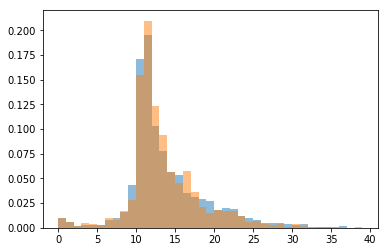

In [26]:
plt.hist(redovniprofM[redovniprofM['Vreme cekanja na zvanje']>=0]['Vreme cekanja na zvanje'],bins=range(40),alpha=0.5,density=True)
plt.hist(redovniprofF[redovniprofF['Vreme cekanja na zvanje']>=0]['Vreme cekanja na zvanje'],bins=range(40),alpha=0.5,density=True)
plt.show()

Испитивање необичног скока у броју запослених са годином стицања образовања 2000.

In [ ]:
plt.hist(zaposleni[zaposleni['Godina sticanja obrazovanja']==2000]['Vreme cekanja na zvanje'],alpha=0.5,bins=range(20))
plt.hist(zaposleni[zaposleni['Godina sticanja obrazovanja']==2001]['Vreme cekanja na zvanje'],alpha=0.5,bins=range(20))
plt.hist(zaposleni[zaposleni['Godina sticanja obrazovanja']==1999]['Vreme cekanja na zvanje'],alpha=0.5,bins=range(20))
plt.show()

In [ ]:
zaposleni[(zaposleni['Godina sticanja obrazovanja']==2000)&(zaposleni['Vreme cekanja na zvanje']==0)].groupby('Zvanje').size()

In [ ]:
zaposleni[(zaposleni['Godina sticanja obrazovanja']==2000)&(zaposleni['Vreme cekanja na zvanje']==0)&(zaposleni['Zvanje']=='Redovni profesor')]